In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import corner

In [4]:
param_names = ['kappa','mu','attenu', 'sigma', 'lambd']
name1 = '../output_files/220131-221916_PG_EXP_5p-A1.h5'
#parameter that excludes 0 in range
param_nonzero = 2
finish = False

In [5]:
file1 = h5py.File(name1, 'r')

chain1 = np.array(file1.get('mcmc').get('chain'))

if not finish:
    nsteps1 = np.where(chain1[:,0,param_nonzero]==0)[0][0]

    chain1 = np.array(file1.get('mcmc').get('chain'))[:nsteps1]
    
print('File 1 shape: ', chain1.shape)

prob1 = np.array(file1.get('mcmc').get('log_prob'))

accepted1 = np.array(file1.get('mcmc').get('accepted'))

ndim = len(param_names)

File 1 shape:  (1647, 24, 5)


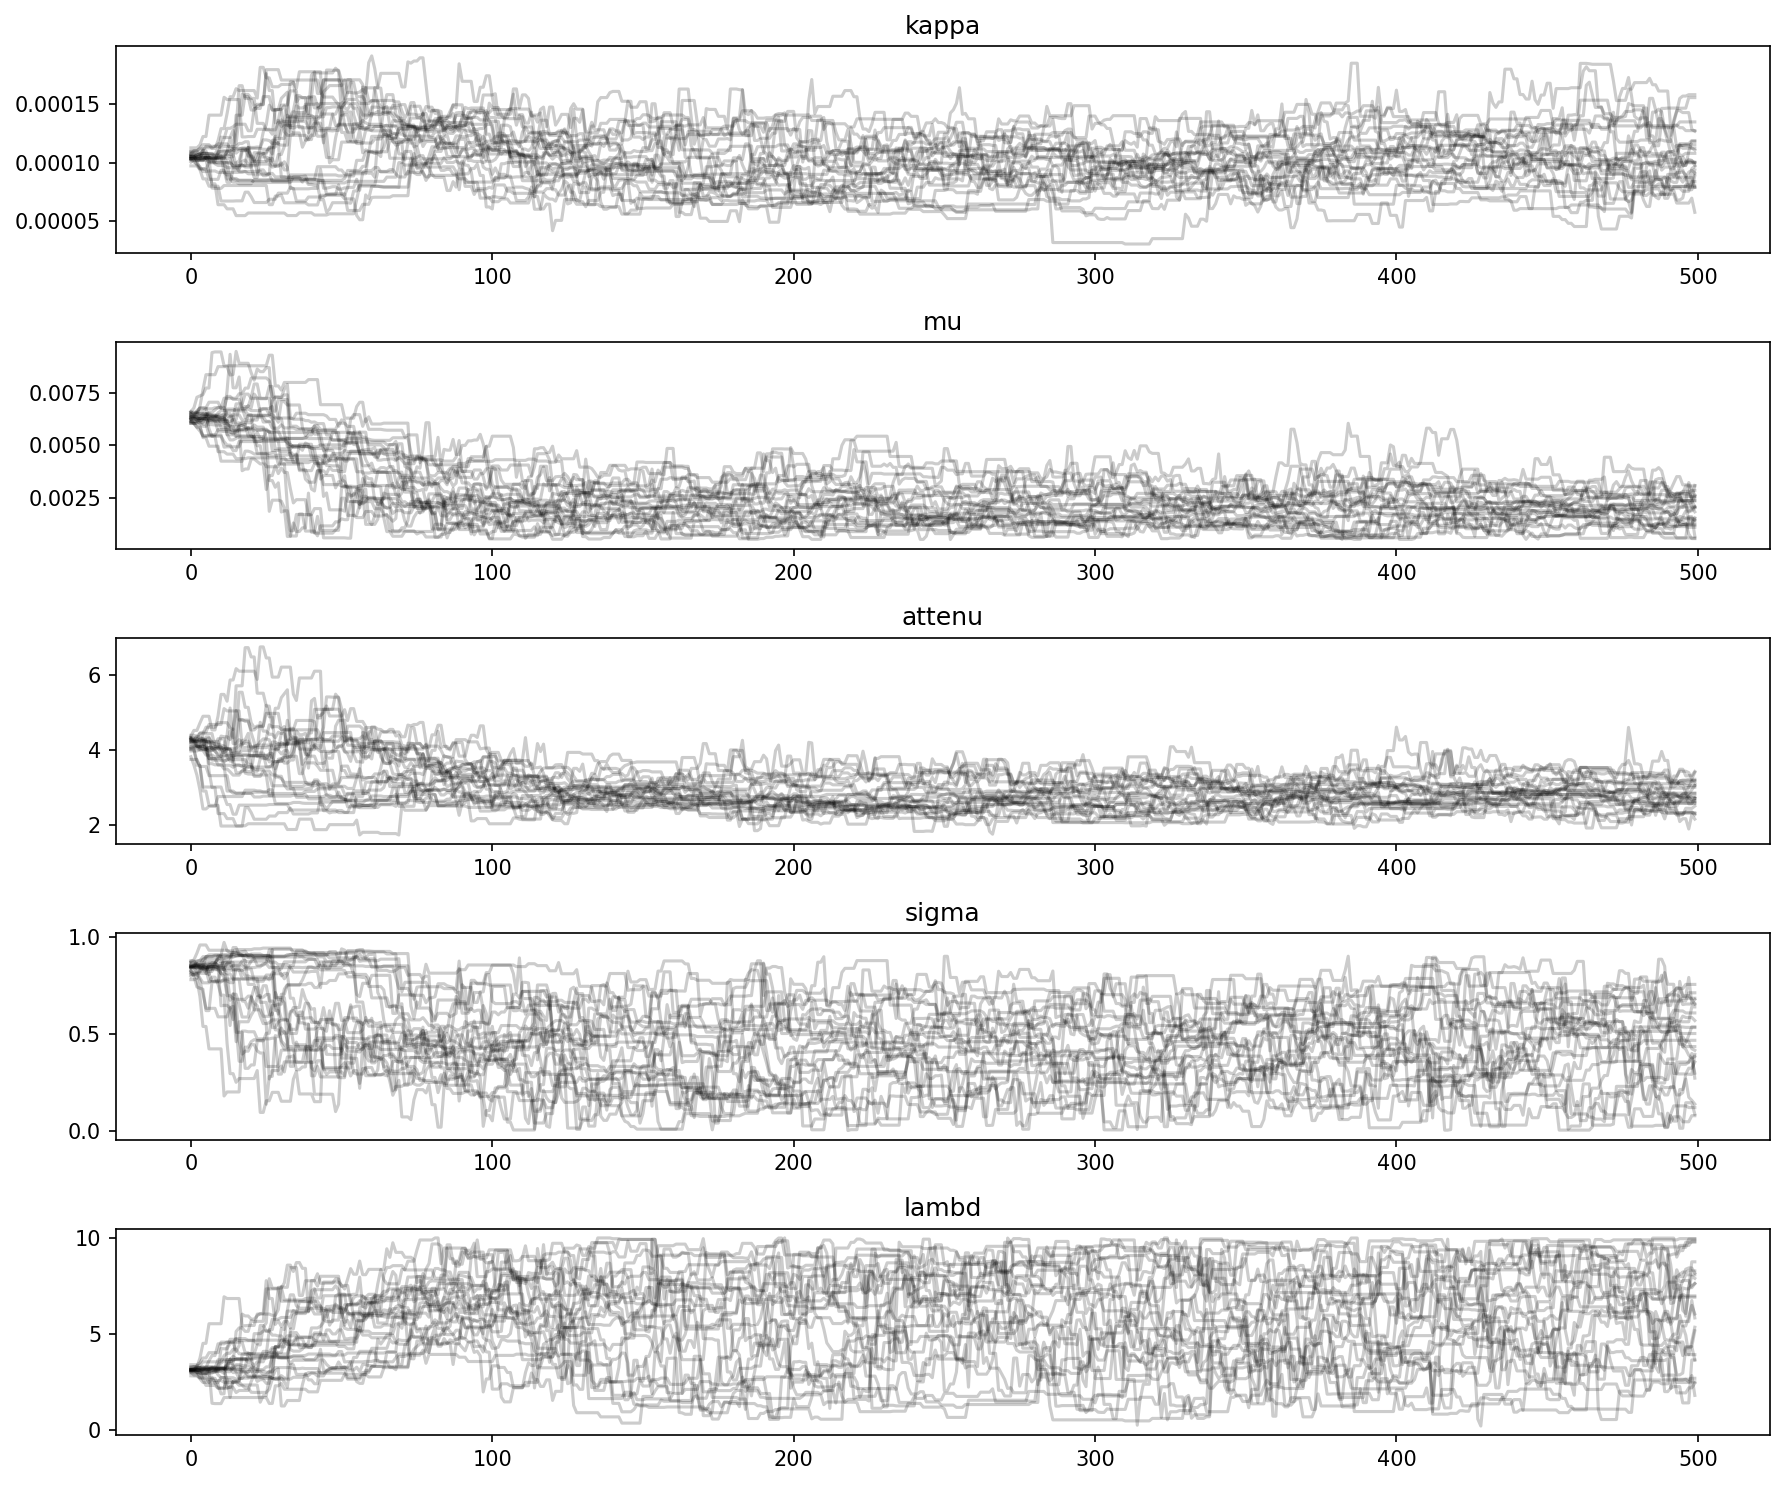

In [6]:
fig, ax = plt.subplots(ndim,1,figsize=(12,10),dpi=150)
for i in range(ndim):
    ax[i].plot(chain1[:500,:,i],c='k',alpha=0.2)
    ax[i].set(title=param_names[i])
    
fig.tight_layout()
#ax[0].set(ylim=(0,5e-4))
#ax[1].set(ylim=(0.0005,0.05))
#ax[2].set(ylim=(0.05,10))

plt.show()

### Choose burnin

In [7]:
burnin = 100

chain1_flat = chain1[burnin:,:,:].reshape((chain1.shape[0]-burnin)*chain1.shape[1],len(param_names))
#chain2_flat = chain2[burnin:,:,:].reshape((chain2.shape[0]-burnin)*chain2.shape[1],len(param_names))
#chain3_flat = chain3[burnin:,:,:].reshape((chain3.shape[0]-burnin)*chain3.shape[1],len(param_names))

[9.688345326052071e-05, 0.001525114675590994, 2.6296847134282544, 0.4676542222884297, 9.070378120038392]


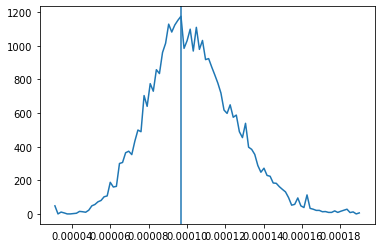

In [8]:
hist = []
maps = []
for i in range(ndim):
    hist.append(np.histogram(chain1_flat[:,i], bins=100))
    index = np.argmax(hist[i][0])
    maps.append(0.5*(hist[i][1][index+1]+hist[i][1][index]))
plt.plot(0.5*(hist[0][1][1:]+hist[0][1][:-1]),hist[0][0])
plt.axvline(x=maps[0])

print(maps)

### Corner plot file 1

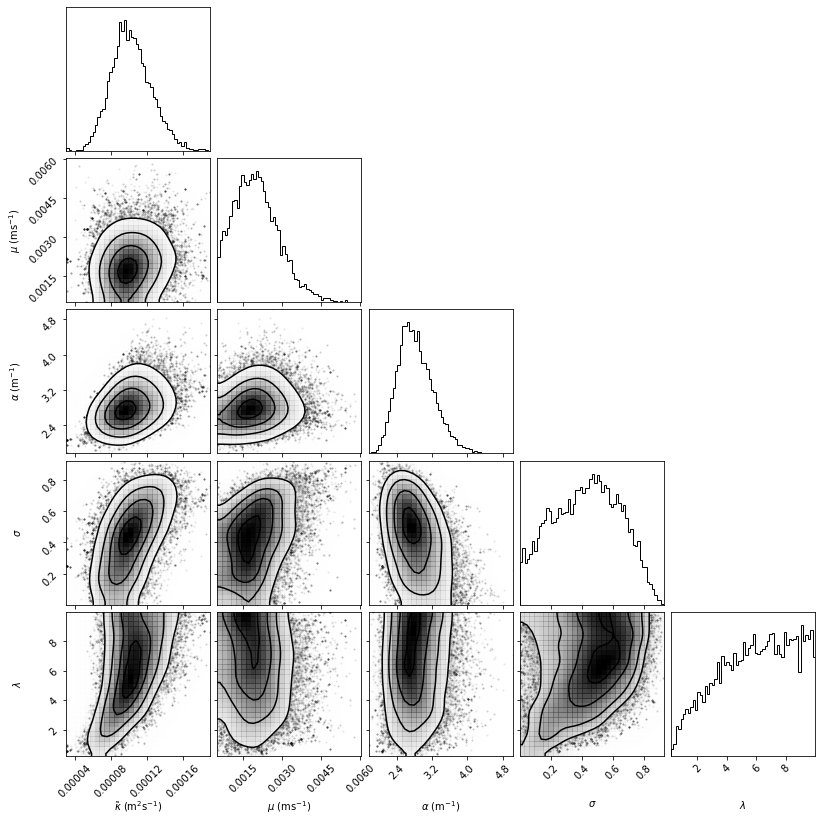

In [10]:
param_labels = [r'$\tilde\kappa$ (m$^2$s$^{-1}$)',r'$\mu$ (ms$^{-1}$)',r'$\alpha$ (m$^{-1}$)',r'$\sigma$',r'$\lambda$']
fig = corner.corner(
    chain1_flat, labels=param_labels,bins=30,hist_bin_factor=2,smooth=2)

## Log probability

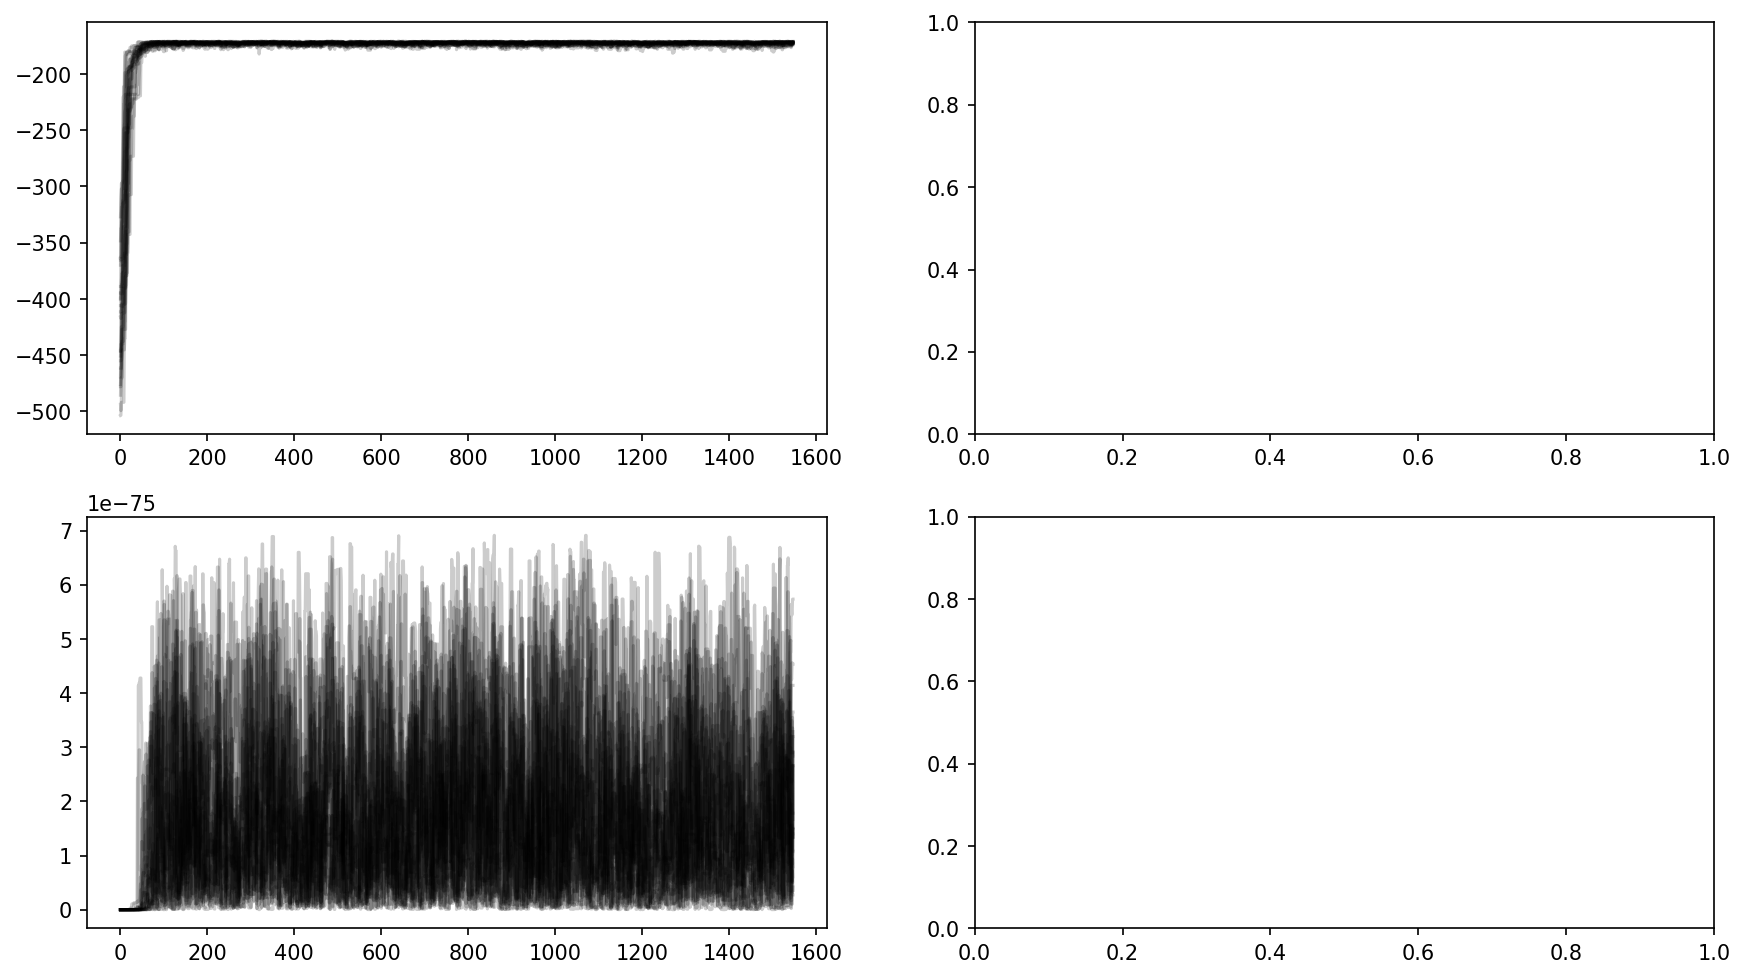

In [18]:
fig, ax = plt.subplots(2,2,dpi=150,figsize=(14,8))
ax[0,0].plot(prob1[:nsteps1],c='k',alpha=0.2)
#ax[0,1].plot(prob2[:nsteps2],c='k',alpha=0.2)
#ax[0,2].plot(prob3[:nsteps3],c='k',alpha=0.2)

ax[1,0].plot(np.exp(prob1[:nsteps1]),c='k',alpha=0.2)
#ax[1,1].plot(np.exp(prob2[:nsteps2]),c='k',alpha=0.2)
#ax[1,2].plot(np.exp(prob3[:nsteps3]),c='k',alpha=0.2)
plt.show()